<p class='alert alert-danger'>
Only submissions in html format are accepted. Replace NetID by your NetID in the cell below and run the cell. DO NOT CHANGE THE NAME OF THIS NOTEBOOK. If characters have been added during download, rename the file to its original name. Do not modify the last cell, and don't forget to run it.


Thanks!
</p>

In [1]:
"""
importing the necessary libraries, do not modify
"""
%matplotlib inline 
# plots graphs within the notebook
%config InlineBackend.figure_format='svg' # not sure what this does, may be default images to svg format

from IPython.display import display,Image, Latex, Math
from __future__ import division
from sympy.interactive import printing
printing.init_printing(use_latex='mathjax')

import time
from IPython.display import clear_output

import SchemDraw as schem
import SchemDraw.elements as e

import matplotlib.pyplot as plt
import numpy as np
import math
import scipy.constants as sc

import sympy as sym

from IPython.core.display import HTML
def header(text):
    raw_html = '<h4>' + str(text) + '</h4>'
    return raw_html

def box(text):
    raw_html = '<div style="border:1px dotted black;padding:2em;">'+str(text)+'</div>'
    return HTML(raw_html)

def nobox(text):
    raw_html = '<p>'+str(text)+'</p>'
    return HTML(raw_html)

def addContent(raw_html):
    global htmlContent
    htmlContent += raw_html
    
class PDF(object):
  def __init__(self, pdf, size=(200,200)):
    self.pdf = pdf
    self.size = size

  def _repr_html_(self):
    return '<iframe src={0} width={1[0]} height={1[1]}></iframe>'.format(self.pdf, self.size)

  def _repr_latex_(self):
    return r'\includegraphics[width=1.0\textwidth]{{{0}}}'.format(self.pdf)

class ListTable(list):
    """ Overridden list class which takes a 2-dimensional list of 
        the form [[1,2,3],[4,5,6]], and renders an HTML Table in 
        IPython Notebook. """
    
    def _repr_html_(self):
        html = ["<table>"]
        for row in self:
            html.append("<tr>")
            
            for col in row:
                html.append("<td>{0}</td>".format(col))
            
            html.append("</tr>")
        html.append("</table>")
        return ''.join(html)
    
font = {'family' : 'serif',
        'color'  : 'black',
        'weight' : 'normal',
        'size'   : 18,
        }

from scipy.constants import convert_temperature
def C2K(T):
    return convert_temperature(T,'Celsius','Kelvin')
def C2F(T):
    return convert_temperature(T,'Celsius','Fahrenheit')
def F2K(T):
    return convert_temperature(T,'Fahrenheit','Kelvin')
def F2C(T):
    return convert_temperature(T,'Fahrenheit','Celsius')
def K2F(T):
    return convert_temperature(T,'Kelvin','Fahrenheit')
def K2C(T):
    return convert_temperature(T,'Kelvin','Celsius')

time_stamp = np.zeros(10)
time_stamp[0] = time.time()

<h1>PB 8.31</h1>
<p>
To cool a summer home without using a vapor-compression refrigeration cycle, air is routed through a plastic pipe ($k=0.15\text{ W/m.K}$, $D_i=0.15\text{ m}$, $D_o=0.17\text{ m}$) that is submerged in an adjoining body of water. The water temperature is nominally at $T_\infty= 17^\circ\text{C}$, and a convection coefﬁcient of $h_o\approx 1500\text{ W/m$^2$. K}$ is maintained at the outer surface of the pipe.

If air from the home enters the pipe at a temperature of $T_{m,i}= 29^\circ\text{C}$ and a volumetric ﬂow rate of $\dot{\forall}_i= 0.025\text{ m$^3$/s}$, what pipe length $L$ is needed to provide a discharge temperature of $T_{m,o}=21^\circ\text{C}$? What is the fan power required
to move the air through this length of pipe if its inner surface is smooth?
</p>

In [2]:
from NewLibraries import thermodynamics as thermo
from NewLibraries import HT_thermal_resistance as res
from NewLibraries import HT_external_convection as extconv
from NewLibraries import HT_internal_convection as intconv
D_i = 0.15 #m
D_o = 0.17 #m
k_pipe = 0.15 #W/(m.K)
T_mi = 29. #C
T_mo = 21. #C
T_infty = 17 #C
Qdot = 0.025 #kg/s
U_m = Qdot/(np.pi*D_i**2/4.)
T_mean_air = (T_mi+T_mo)/2.
h_o = 1500 #W/m^2K

T_m = (T_mi+T_mo)/2.
print("Average Temperature over the pipe length T_m= %2.1f C" %T_m)


airprop_m = thermo.Fluid("air")
airprop_m.get_properties(C2K(T_m))

?intconv.PipeFlow

airflow = intconv.PipeFlow(D_i, Um = U_m, nu = airprop_m.nu )


Average Temperature over the pipe length T_m= 25.0 C


<p>
For a section of pipe of length $\Delta x$, where the fluid is cooled by the fluid outside of the pipe, the heat transfer $dq_{conv}$ between the flow and the wall is:
<p>
$$
-dq_{conv}=\dot{m}C_p\Delta T_m
$$
</p>
This radial heat transfer can also be expressed as a function of the local heat flux $q''(x)$ assumed to vary little over the small distance $\Delta x$,
<p>
$$
dq_{conv}=q'(x)\Delta x
$$
</p>
and 
<p>
$$
q'(x) = \frac{1}{R'_{tot}}\left(T_{m,x}-T_\infty\right)
$$
</p>
leading to 
<p>
$$
\dot{m}C_p\Delta T_m = -\frac{\Delta x}{R'_{tot}}\left(T_{m,x}-T_\infty\right)
$$
<p class='alert alert-info'>
Note that in cylindrical system, the heat flux (heat rate per unit area, $W/m^2$) is not conserved due to the increase of surface area though which radial heat transfer travels as a function of increasing radial position. Consequently, one can only calculate heat rate per unit length of the pipe ($W/m$) or heat rate ($W$) in cylindrical coordinates. In spherical coordinates, one can only calculate heat rate.
</p>
In the present case, the thermal circuit looks as follows:
</p>

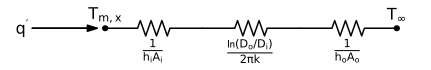

In [3]:
R = []
#?res.Resistance
R.append(res.Resistance(r"$\frac{1}{h_iA_i}$","W/m"))
R.append(res.Resistance(r"$\frac{\ln(D_o/D_i)}{2\pi k}$","W/m"))
R.append(res.Resistance(r"$\frac{1}{h_oA_o}$","W/m"))

d= schem.Drawing()
d.add( e.DOT, label = r"$T_{m,x}$")
d.add( e.RES, d = 'right', botlabel = R[0].name)
d.add( e.RES, d = 'right', botlabel = R[1].name)
d.add( e.RES, d = 'right', botlabel = R[2].name)
d.add( e.DOT, label = r"$T_{\infty}$")
L1 = d.add(e.LINE, lftlabel = "$q'$", endpts = [[-2.25, 0], [-0.25, 0]])
d.labelI(L1, arrowofst = 0)
d.draw()


In [4]:
#determination of h_i:
print("Re= %5.0f" %airflow.Re)

Re= 13625


<p>The flow is turbulent. We choose to use the Dittus Boetler correlation, in cooling mode.
<p class='alert alert-info'>
All correlations for fully developed flows are valid when
$$
\frac{L}{D}\gtrsim 10
$$
<p>
</p>

In [5]:
?intconv.PipeFlow
airflow.Dittus_Boelter("cooling",airprop_m.Pr)
h_i = airflow.Nu*airprop_m.k/D_i

print("h_i= %1.2f W/m^2.K" %h_i)
A_i = np.pi*D_i
R[0].convection(h_i,A_i)
R[1].conduction("cylindrical",k_pipe, r_a = D_i/2, r_b = D_o/2, L_pipe = 1.0)
A_o = np.pi*D_o
R[2].convection(h_o,A_o)
R_tot = res.serial_sum(R,0,2)

h_i= 7.32 W/m^2.K


<p>
In the limit $\Delta T_m\rightarrow 0$ and $\Delta x\rightarrow 0$, this equation defines the longitudinal temperature gradient of the mean temperature
<p>
$$
\frac{d T_{m,x}}{dx} = -\frac{1}{\dot{m}C_pR'_{tot}}\left(T_{m,x}-T_\infty\right)
$$
</p>
which is equivalent to 
<p>
$$
\frac{d \left(T_{m,x}-T_\infty\right)}{dx} = -\frac{1}{\dot{m}C_pR'_{tot}}\left(T_{m,x}-T_\infty\right)
$$
</p>
Integrating from the inlet to the outlet,
<p>
$$
\int_{T_{m,i}}^{T_{m,o}}\frac{d \left(T_{m,x}-T_\infty\right)}{\left(T_{m,x}-T_\infty\right)} = -\int_0^L\frac{1}{\dot{m}C_pR'_{tot}}dx
$$
</p>
yields the equation for the exponential relation between the mean outlet and inlet temperature:
<p class='alert alert-danger'>
$$
\ln\left(\frac{T_{m,o}-T_\infty}{T_{m,i}-T_\infty}\right) = -\frac{L}{\dot{m}C_pR'_{tot}}
$$
</p>
or
<p class='alert alert-danger'>
$$
\frac{T_{m,o}-T_\infty}{T_{m,i}-T_\infty} = \exp\left(-\frac{L}{\dot{m}C_pR'_{tot}}\right)
$$
</p>
<p class='alert alert-info'>
Note that this integration supposed that $R'_{tot}$ is constant, which is only true if the convection coefficients used to calculate the total thermal resistance are averaged coefficients:
$$
\bar{h}=\frac{1}{L}\int_0^Lh(x)dx
$$
Similarly, the thermodynamic properties are estimated at the average temperature of the inlet and outlet mean temperatures:
$$
T_m=\frac{T_{m,i}+T_{m,o}}{2}
$$
</p>
L is then easily obtained from
$$
L = -\dot{m}C_pR'_{tot}\ln\left(\frac{T_{m,o}-T_\infty}{T_{m,i}-T_\infty}\right)
$$
</p>

In [6]:
mdot = airprop_m.rho*Qdot
P_i = np.pi*D_i
L = -mdot*airprop_m.Cp*R_tot*np.log((T_mo-T_infty)/(T_mi-T_infty))
print("To achieve T_m,o = %2.1f F, the required length is %2.2f m" %(C2F(T_mo),L))


To achieve T_m,o = 69.8 F, the required length is 13.87 m


<p>
The pressure drop
$$
\Delta P = f\frac{L}{D_i}\frac{\rho U_m^2}{2}
$$
requires the calculation of the friction factor $f$ using
<p>

In [7]:
airflow.f_turbulent(airflow.Re)
print("friction factor: %1.3f" %airflow.f)
Delta_P = airflow.f*L/D_i*airprop_m.rho*airflow.Um**2/2.


Pipe wall is assumed to be hydrodynamically smooth
friction factor: 0.028


<p> The fan power is 
$$
{\cal P}=\dot{Q}\Delta P
$$
</p>

In [8]:
Power = Qdot*Delta_P
print("Fan power: %1.3f W" %Power)

Fan power: 0.078 W


<h1> PB 8.36</h1>
Hot water at mean temperature $T_m=50\text{$^\circ$C}$ is routed from one building in which it is generated to an adjoining building in which it is used for space heating. Transfer between the buildings occurs in a steel pipe ($k=60\text{ W/m.K}$) of $100 \text{ mm}$ outside diameter and 8-mm wall thickness. During the winter, representative environmental conditions involve air at $T_\infty= -5\text{$^\circ$C}$ and $V_\infty=3\text{ m/s}$ in cross ﬂow over the pipe.
Using the Churchill Bernstein and Dittus Boehler correlations, calculate the total heat transfer rate <b>per unit length</b> $q'$, the daily energy cost $Q'=q'\times 24\text{ h/d}$ per meter and the cost per day and per meter assuming an electricity cost of $\text{\$}0.05\text{/kW.h}$.

In [9]:
D_o = 100.e-3 #mm
D_i = D_o - 2* 8e-3 #mm
k_p = 60. # W/m.K
T_infty = -5 #C
V_infty = 3 #m/s
T_m = 50. #C
k_pipe = 60 #W/m.K
U_m = 0.5 #m/s

T_m_air = (T_infty + T_m)/2.

air = thermo.Fluid("air")
air.get_properties(C2K(T_m_air))

water = thermo.Fluid("water")
water.get_properties(C2K(T_m))

waterflow = intconv.PipeFlow(D_i,Um = U_m, nu = water.nu)
print("Re_i= %5.0f" %waterflow.Re)
waterflow.Dittus_Boelter("cooling",water.Pr)
h_i = waterflow.Nu*water.k/D_i
print("h_i= %4.1f W/m" %h_i)

# external convection
Re_o = V_infty*D_o/air.nu
airflow = extconv.CircularCylinder('Churchill-Bernstein',Re_o,air.Pr) 
h_o = airflow.Nu*air.k/D_o
print("h_o= %4.1f W/m" %h_o)

Re_i= 75882
h_i= 2067.0 W/m
h_o= 20.3 W/m


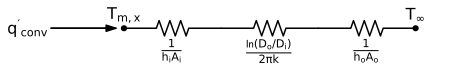

In [10]:
R = []
#?res.Resistance
R.append(res.Resistance(r"$\frac{1}{h_iA_i}$","W/m"))
R.append(res.Resistance(r"$\frac{\ln(D_o/D_i)}{2\pi k}$","W/m"))
R.append(res.Resistance(r"$\frac{1}{h_oA_o}$","W/m"))

d= schem.Drawing()
d.add( e.DOT, label = r"$T_{m,x}$")
d.add( e.RES, d = 'right', botlabel = R[0].name)
d.add( e.RES, d = 'right', botlabel = R[1].name)
d.add( e.RES, d = 'right', botlabel = R[2].name)
d.add( e.DOT, label = r"$T_{\infty}$")
L1 = d.add(e.LINE, lftlabel = "$q'_{conv}$", endpts = [[-2.25, 0], [-0.25, 0]])
d.labelI(L1, arrowofst = 0)
d.draw()

R[0].convection(h_i,np.pi*D_i)
R[1].conduction("cylindrical",k_pipe,r_a = D_i/2., r_b = D_o/2., L_pipe = 1.0)
R[2].convection(h_o,np.pi*D_o)


In [11]:
q_prime = (T_m - T_infty)/res.serial_sum(R,0,2)
print("total heat rate per unit length of the pipe: %3.0f W/m" %q_prime)
Cost = q_prime *24 * 0.05e-3
print("Cost per day per pipe unit length: $%1.2f /m.d" %Cost)

total heat rate per unit length of the pipe: 345 W/m
Cost per day per pipe unit length: $0.41 /m.d


<h1>PB 9.64</h1>
<p>
Consider the hot water pipe of Problem 8.36, but under conditions for which the ambient air is not in cross flow over the pipe and is, instead, quiescent. Accounting for the effect of radiation with a pipe emissivity of 􏰇$\varepsilon_p=0.6$, what is the corresponding daily cost of heat loss per unit length of the uninsulated pipe?
</p>

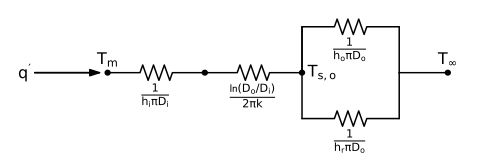

In [12]:
?res.Resistance
R = []
#?res.Resistance
R.append(res.Resistance(r"$\frac{1}{h_i\pi D_i}$","W/m"))
R.append(res.Resistance(r"$\frac{\ln(D_o/D_i)}{2\pi k}$","W/m"))
R.append(res.Resistance(r"$\frac{1}{h_o\pi D_o}$","W/m"))
R.append(res.Resistance(r"$\frac{1}{h_r\pi D_o}$","W/m"))

d = schem.Drawing()
d.add( e.DOT, label= r"$T_m$")
d.add( e.RES, d = 'right', botlabel = R[0].name)
d.add( e.DOT)
d.add( e.RES, d = 'right', botlabel = R[1].name)
d.add( e.DOT, rgtlabel = r"$T_{s,o}$")
L0 = d.add ( e.LINE, d = 'up', l = 1.5)
d.add( e.RES, d = 'right', botlabel = R[2].name)
d.add( e.LINE, d = 'down', l = 1.5)
d.add( e.LINE, d = 'down', xy = L0.end)
d.add( e.RES, d = 'right', botlabel = R[3].name)
d.add( e.LINE, d = 'up', l = 1.5)
d.add( e.LINE, d = 'right', l = 1.5)
d.add( e.DOT, label = r"$T_\infty$")
L1 = d.add(e.LINE, lftlabel = "$q'$", endpts = [[-2.25, 0], [-0.25, 0]])
d.labelI(L1, arrowofst = 0)
d.draw()

<p> To solve this problem, we need $T_{s,o}$ to determine the radiation heat transfer resistance and the film temperature for thermodynamic properties. Unfortunately solving for $T_{s,o}$ requires calculating $q'$. Once again, we need to make a guess.
</p>
<p>
An educated guess takes into consideration the fact that steel conducts heat really well. Therefore we assume that $T_{s,o}\approx T_m$. This assumption must be tested at the end.
</p>

In [13]:

R[0].convection(h_i,np.pi*D_i)
R[1].conduction("cylindrical",k_pipe,r_a = D_i/2., r_b = D_o/2., L_pipe = 1.0)


T_so = T_m
R[3].radiation(0.6,T_so,T_infty,np.pi*D_o)
T_f = 0.5*(T_m+T_infty)
air.get_properties(C2K(T_f))

#
from NewLibraries import HT_natural_convection as natconv
?natconv.HorizontalCylinder
Ra_o = natconv.Ra(9.81,air.beta,T_so-T_infty,D_o,air.nu,air.alpha)
print("Ra= %1.2e" %Ra_o)
airflow_o = natconv.HorizontalCylinder("Churchill-Chu", Ra_o, Pr = air.Pr)
print("Nu = %2.2f" %airflow_o.Nu)
h_o = airflow_o.Nu*air.k/D_o
print("Convection coefficient in air h_o %3.2f W/m^2.K" %h_o)
R[2].convection(h_o,np.pi*D_o)
R_tot = res.serial_sum(R,0,1)+res.parallel_sum(R,2,3)

q_prime = (T_m - T_infty)/R_tot
print("Heat rate per unit length of pipe: %3.2f W/m" %q_prime)
New_T_so = T_m - q_prime*res.serial_sum(R,0,1)
print("New surface temperature: %2.2f C" %New_T_so)

Cost = q_prime *24 * 0.05e-3
print("Cost per day per pipe unit length: $%1.2f /m.d" %Cost)

Ra= 5.52e+06
Nu = 23.73
Convection coefficient in air h_o 6.14 W/m^2.K
Heat rate per unit length of pipe: 105.70 W/m
New surface temperature: 49.76 C
Cost per day per pipe unit length: $0.13 /m.d


<p>The computed surface temperature is very close to our initial guess. There is no need for further iteration.</p>
<p>Note that the heat transfer with natural convection is less than with force convection, as expected<p>